In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'District of Columbia': 'DC',
    'Delaware': 'DE',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY',
}
us_state_abbrev_num = {}
counter = 1
for key, value in us_state_abbrev.items():
    us_state_abbrev_num[counter] = key
    counter +=1
data = pd.read_csv("elsec15_csv.csv", index_col=False)
us_state_abbrev_num

/Users/jpbesgen/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


{1: 'Alabama',
 2: 'Alaska',
 3: 'Arizona',
 4: 'Arkansas',
 5: 'California',
 6: 'Colorado',
 7: 'Connecticut',
 8: 'District of Columbia',
 9: 'Delaware',
 10: 'Florida',
 11: 'Georgia',
 12: 'Hawaii',
 13: 'Idaho',
 14: 'Illinois',
 15: 'Indiana',
 16: 'Iowa',
 17: 'Kansas',
 18: 'Kentucky',
 19: 'Louisiana',
 20: 'Maine',
 21: 'Maryland',
 22: 'Massachusetts',
 23: 'Michigan',
 24: 'Minnesota',
 25: 'Mississippi',
 26: 'Missouri',
 27: 'Montana',
 28: 'Nebraska',
 29: 'Nevada',
 30: 'New Hampshire',
 31: 'New Jersey',
 32: 'New Mexico',
 33: 'New York',
 34: 'North Carolina',
 35: 'North Dakota',
 36: 'Ohio',
 37: 'Oklahoma',
 38: 'Oregon',
 39: 'Pennsylvania',
 40: 'Rhode Island',
 41: 'South Carolina',
 42: 'South Dakota',
 43: 'Tennessee',
 44: 'Texas',
 45: 'Utah',
 46: 'Vermont',
 47: 'Virginia',
 48: 'Washington',
 49: 'West Virginia',
 50: 'Wisconsin',
 51: 'Wyoming'}

In [3]:
data['TOTALREV'].nlargest(20)
data[data['TOTALREV']==9254891]

,STATE,IDCENSUS,NAME,CONUM,CSA,CBSA,SCHLEV,NCESID,YRDATA,V33,...,V32,_19H,_21F,_31F,_41F,_61V,_66V,W01,W31,W61
1039,5,5501905900000,LOS ANGELES UNIF SCH DIST,6037,348,31080,3,0622710,15,646683,...,0,10545135,461875,710345,10296665,0,0,869643,778282,2355662


In [4]:
def change_stateNum_to_stateAbreviation(data):
    state_abr = [us_state_abbrev[state_abr_name] for state_abr_name in 
             [us_state_abbrev_num[state_int] for state_int in 
              [state for pos,state in data['STATE'].items()]]]
    data.drop(['STATE'],axis = 1)
    data['STATE'] = state_abr
    return data
def create_STATE_vs_TARGET_horizontal_bar_graph(dataset, target_col_string, upper_return_limit = 20, title = '',x_label = ''):
    fig = plt.figure(figsize=(10,5))
    sorted_data= dataset.sort_values(target_col_string,ascending = False)[:upper_return_limit]
    sorted_data_with_state_abbr = change_stateNum_to_stateAbreviation(sorted_data)
    sorted_data_with_state_abbr_plot = sns.barplot(x = target_col_string, 
                                            y = 'STATE',
                                            data = sorted_data_with_state_abbr,
                                            orient = 'h',
                                            order = sorted_data['STATE'])
    if title != '':
        sorted_data_with_state_abbr_plot.set_title(title.title())
    else:
        sorted_data_with_state_abbr_plot.set_title('Top ' + str(upper_return_limit) + " " + target_col_string)
    if x_label != '':
        sorted_data_with_state_abbr_plot.set(xlabel= x_label.title(), 
                                             ylabel="State(Abbreviation)")
    else: 
        sorted_data_with_state_abbr_plot.set(xlabel= target_col_string, 
                                             ylabel="State(Abbreviation)")

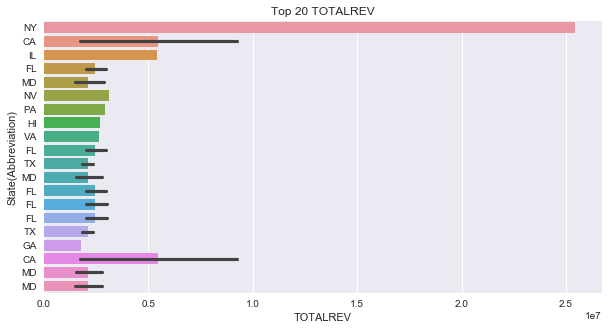

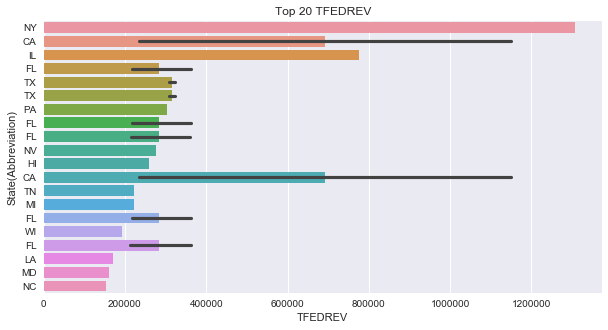

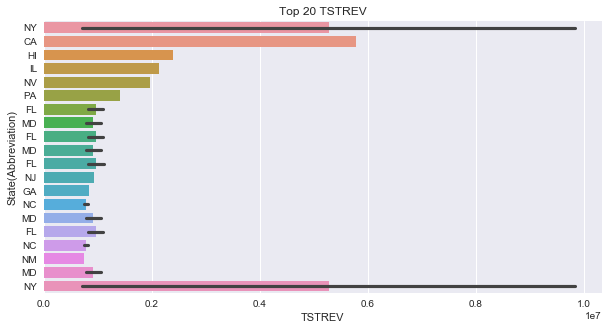

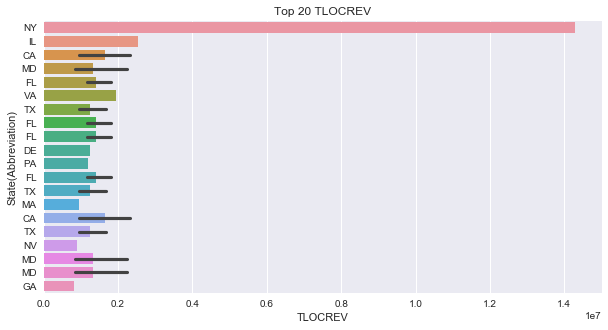

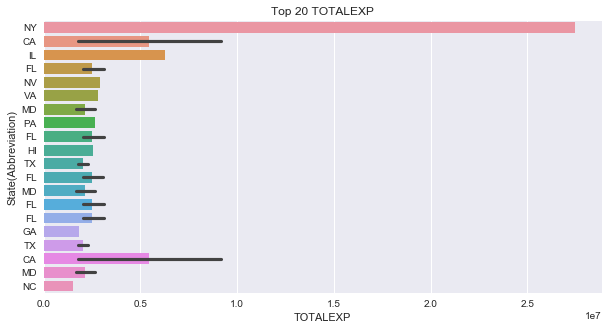

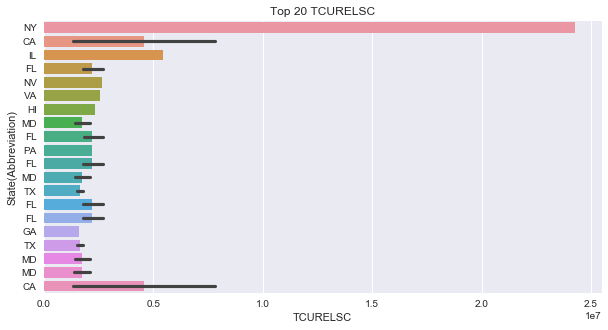

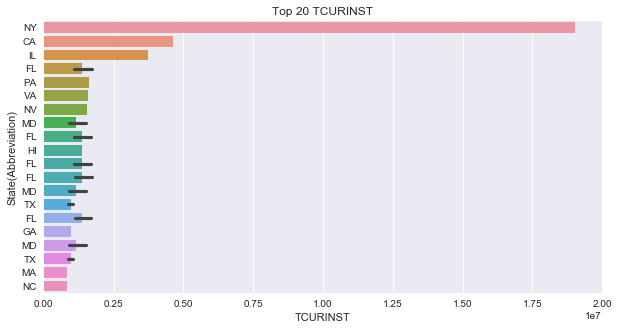

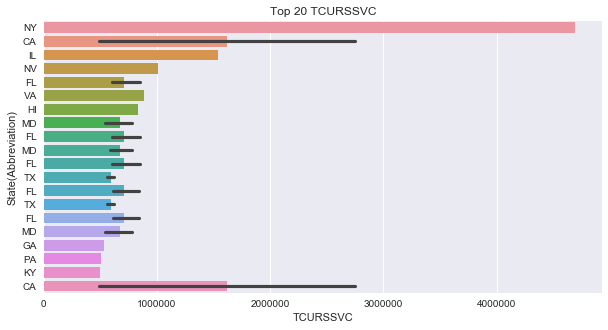

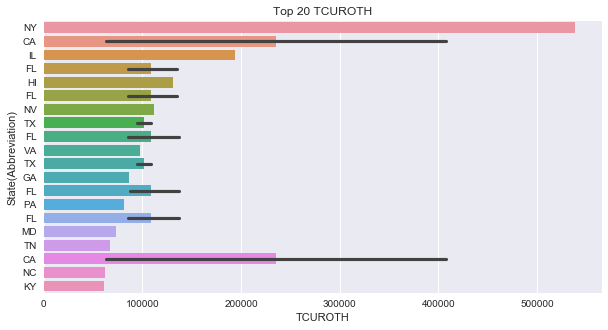

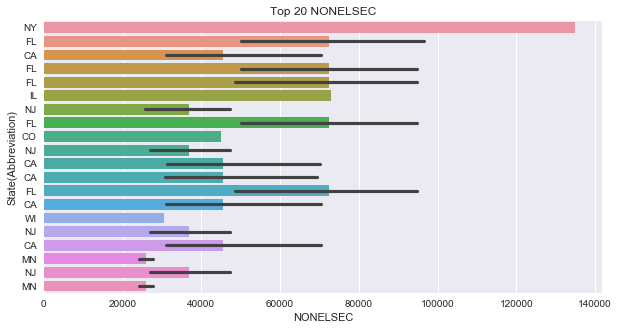

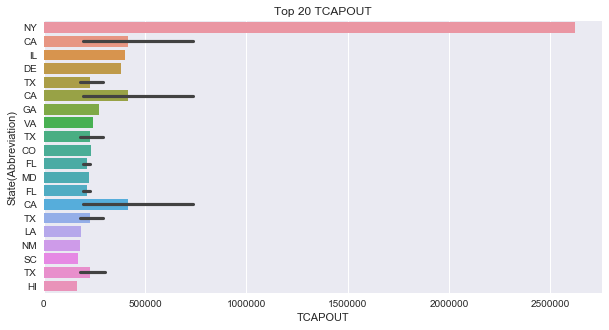

In [5]:
all_totals = ['TOTALREV','TFEDREV','TSTREV','TLOCREV','TOTALEXP','TCURELSC','TCURINST','TCURSSVC','TCUROTH','NONELSEC','TCAPOUT']
for i in all_totals:
    create_STATE_vs_TARGET_horizontal_bar_graph(data,i)

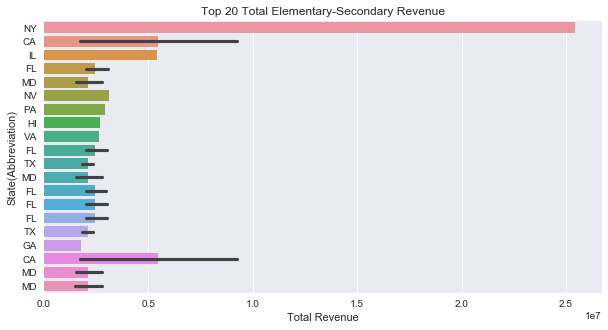

In [6]:
# Graph of Top 20 Total Elementary-Secondary Revenue
create_STATE_vs_TARGET_horizontal_bar_graph(data,
                                            'TOTALREV',
                                            20,
                                            'Top 20 Total Elementary-Secondary Revenue'
                                            ,'Total Revenue')

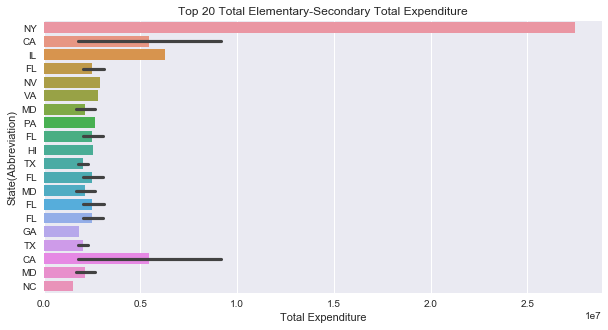

In [7]:
# Graph of Top 20 Total Elementary-Secondary Total Expenditure
create_STATE_vs_TARGET_horizontal_bar_graph(data,
                                            'TOTALEXP',
                                            20,
                                            'Top 20 Total Elementary-Secondary Total Expenditure'
                                            ,'Total Expenditure')

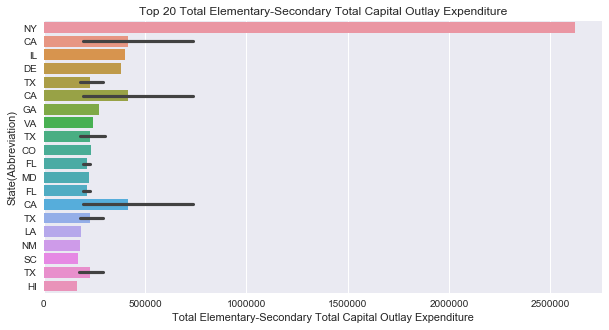

In [8]:
# Graph of Top 20 Total Elementary-Secondary Total Capital Outlay Expenditure
create_STATE_vs_TARGET_horizontal_bar_graph(data,
                                            'TCAPOUT',
                                            20,
                                            'Top 20 Total Elementary-Secondary Total Capital Outlay Expenditure'
                                            ,'Total Elementary-Secondary Total Capital Outlay Expenditure')

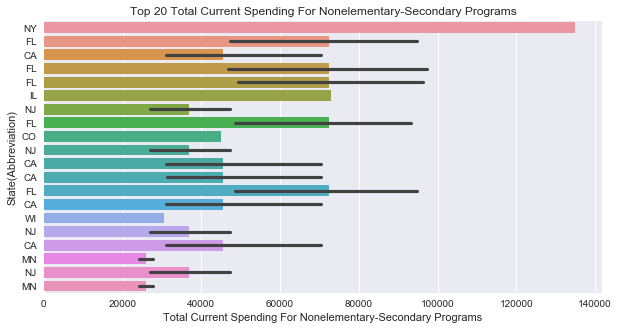

In [9]:
# Graph for Top 20 Total Current Spending For Nonelementary-Secondary Programs
create_STATE_vs_TARGET_horizontal_bar_graph(data,
                                            'NONELSEC',
                                            20,
                                            'Top 20 Total Current Spending For Nonelementary-Secondary Programs',
                                            'Total Current Spending For Nonelementary-Secondary Programs')

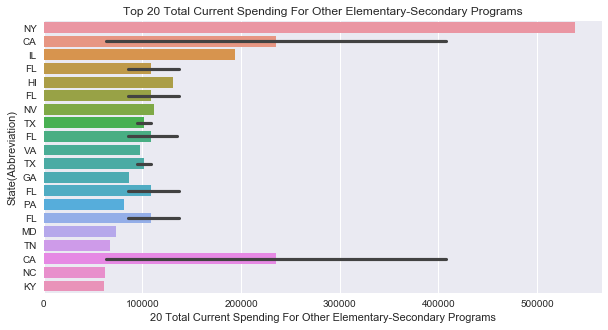

In [10]:
# Graph for Top 20 Total Current Spending For Other Elementary-Secondary Programs
create_STATE_vs_TARGET_horizontal_bar_graph(data,
                                            'TCUROTH',
                                            20,
                                            'Top 20 Total Current Spending For Other Elementary-Secondary Programs',
                                            '20 Total Current Spending For Other Elementary-Secondary Programs')

[<matplotlib.text.Text at 0x11b2a4630>, <matplotlib.text.Text at 0x1135e0e80>]

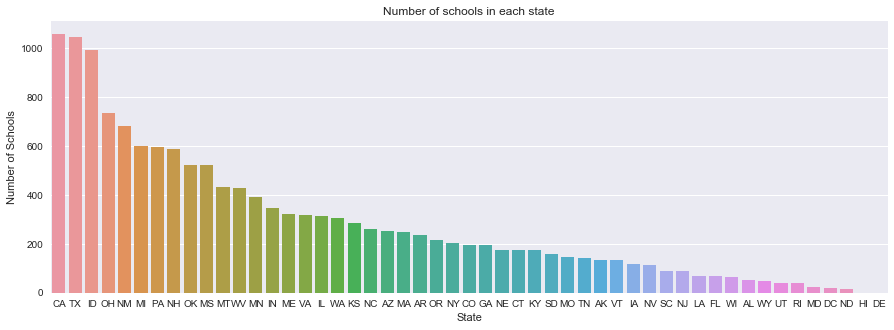

In [32]:
data_mod = data.groupby(['STATE']).count()
data_mod['states'] = np.sort(['AL', 'AK',
    'AZ','AR','CA','CO','CT','DE', 'DC', 'FL','GA','HI','ID','IL','IN','IA','KS','KY','LA','ME','MD','MA','MI','MN','MS','MO',
    'MT','NE','NV','NH','NJ','NM','NY','NC','ND','OH','OK','OR','PA','RI','SC','SD','TN','TX','UT','VT','VA','WA','WV','WI','WY'])
fig = plt.figure(figsize=(15,5))
data_mod = data_mod.sort_values('NAME', ascending=False)
number_of_schools = sns.barplot(x='states', y='NAME', data=data_mod)
number_of_schools.set_title('Number of schools in each state')
number_of_schools.set(xlabel= 'State', ylabel= 'Number of Schools')

,IDCENSUS,CONUM,SCHLEV,YRDATA,V33,TOTALREV,TFEDREV,C14,C15,C16,...,_19H,_21F,_31F,_41F,_61V,_66V,W01,W31,W61,states
STATE,,,,,,,,,,,,,,,,,,,,,
5,5791933536957200,6405489,2385,15855,6226523,78248042,7556365,1787665,1842851,238379,...,56772071,7673388,4349843,59752489,0,0,4385026,9458536,21676475,CA
44,46559284860147504,50468704,3102,15690,5004866,55582029,5830972,1331773,824628,165842,...,67912555,18019362,13820702,72275448,3110152,3437333,2619733,10525060,16862161,TX
10,703727806700000,808550,201,1005,2743641,26971491,3118041,787571,610683,94858,...,15500584,731105,1456052,14775644,0,0,619614,757933,6099760,FL
33,22847768545750500,24596664,1978,10230,2631532,63712218,2869847,620076,665729,0,...,29867685,3508405,3433341,29551123,2057069,2104927,378947,1237144,9010588,NM
14,14388791010030100,16958944,2647,14880,2047123,32096832,2262192,625703,539106,84998,...,19983559,2249789,1685125,20548238,12102,716373,1402629,1149653,12483239,ID
11,2255583722700000,2579742,648,2940,1717805,18584666,1831221,541220,308972,64244,...,4385705,389720,625086,4015725,6048,10259,373386,2186422,2959119,GA
36,26757822555600000,28652303,2587,10995,1600222,24378660,1676820,520761,374425,0,...,11078847,1673009,1525316,11266552,31034,31387,826146,2890073,6354925,OH
39,23543843817760200,25067890,2167,8940,1589429,29967185,1857885,524345,396484,90500,...,26486193,4931491,5044407,26685977,49815,48523,218743,2954603,6778379,PA
34,3922072875765800,4266331,345,1725,1465031,13146934,1589570,437535,316143,53165,...,7839991,1274552,1329096,7785453,0,0,0,0,0,NV


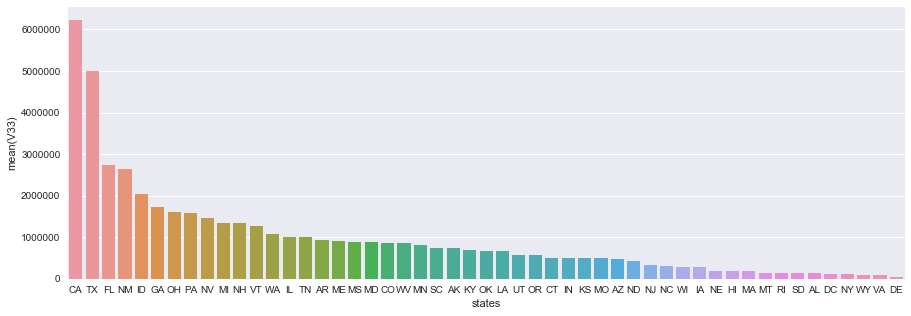

In [33]:
data_mod = data.groupby(['STATE']).sum()
data_mod['states'] = np.sort(['AL', 'AK',
    'AZ','AR','CA','CO','CT','DE', 'DC', 'FL','GA','HI','ID','IL','IN','IA','KS','KY','LA','ME','MD','MA','MI','MN','MS','MO',
    'MT','NE','NV','NH','NJ','NM','NY','NC','ND','OH','OK','OR','PA','RI','SC','SD','TN','TX','UT','VT','VA','WA','WV','WI','WY'])
fig = plt.figure(figsize=(15,5))
data_mod = data_mod.sort_values('V33', ascending=False)
sns.barplot(x='states', y='V33', linewidth=10, data=data_mod)
data_mod

In [34]:
def compare_states_by_count(compare_val, y_axis, title, data, sort=False, x_axis='states'):
    data = data.groupby(['STATE']).count()
    data['states'] = np.sort(['AL', 'AK',
    'AZ','AR','CA','CO','CT','DE', 'DC', 'FL','GA','HI','ID','IL','IN','IA','KS','KY','LA','ME','MD','MA','MI','MN','MS','MO',
    'MT','NE','NV','NH','NJ','NM','NY','NC','ND','OH','OK','OR','PA','RI','SC','SD','TN','TX','UT','VT','VA','WA','WV','WI','WY'])
    fig = plt.figure(figsize=(15,5))
    data = data.sort_values(compare_val, ascending=False)
    plot = sns.barplot(x='states', y=compare_val, data=data)
    plot.set_title(title)
    plot.set(xlabel= 'State', ylabel= y_axis)

In [ ]:
def compare_states_by_sum(compare_val, y_axis, title, data, sort=False, x_axis='states'):
    data = data.groupby(['STATE']).sum()
    data['states'] = np.sort(['AL', 'AK',
    'AZ','AR','CA','CO','CT','DE', 'DC', 'FL','GA','HI','ID','IL','IN','IA','KS','KY','LA','ME','MD','MA','MI','MN','MS','MO',
    'MT','NE','NV','NH','NJ','NM','NY','NC','ND','OH','OK','OR','PA','RI','SC','SD','TN','TX','UT','VT','VA','WA','WV','WI','WY'])
    fig = plt.figure(figsize=(15,5))
    data = data.sort_values(compare_val, ascending=False)
    plot = sns.barplot(x='states', y=compare_val, data=data)
    plot.set_title(title)
    plot.set(xlabel= 'State', ylabel= y_axis)

In [ ]:
# Number of Schools in Each State
compare_states_by_count(compare_val='NAME', y_axis='Number of Schools', title='Number of schools in each state', data=data)

In [ ]:
# Number of Students in Each State
compare_states_by_sum(compare_val='V33', y_axis='Number of Students', title='Number of students in each state', data=data)

In [ ]:
# Amount of total revenue per state
compare_states_by_sum(compare_val='TOTALREV', y_axis='Total Revenue', title='Amount of total revenue per state', data=data)

In [ ]:
# Amount of federal revenue per state
compare_states_by_sum(compare_val='TFEDREV', y_axis='Federal Revenue', title='Amount of federal revenue per state', data=data)

In [ ]:
# Amount of state revenue per state
compare_states_by_sum(compare_val='TSTREV', y_axis='State Revenue', title='Amount of state revenue per state', data=data)

In [ ]:
# Amount of local revenue per state
compare_states_by_sum(compare_val='TLOCREV', y_axis='Local Revenue', title='Amount of local revenue per state', data=data)

In [ ]:
# Amount of total spending per state
compare_states_by_sum(compare_val='TCURELSC', y_axis='Total Spending', title='Amount of Total Spending per state', data=data)

In [ ]:
# Amount of capital outlay expenditures per state
compare_states_by_sum(compare_val='TCAPOUT', y_axis='Capital Outlay Expenditures', title='Amount of Capital Outlay Expenditures per state', data=data)

In [ ]:
# Amount of Support Spending per state
compare_states_by_sum(compare_val='TCURSSVC', y_axis='Support Services Spending', title='Amount of Support Service Expenditures per state', data=data)

In [ ]:
def compare_part_to_whole_by_state(part_val, whole_val, y_axis, title, data, sort=False, x_axis='states'):
    data = data.groupby(['STATE']).sum()
    data['states'] = np.sort(['AL', 'AK',
    'AZ','AR','CA','CO','CT','DE', 'DC', 'FL','GA','HI','ID','IL','IN','IA','KS','KY','LA','ME','MD','MA','MI','MN','MS','MO',
    'MT','NE','NV','NH','NJ','NM','NY','NC','ND','OH','OK','OR','PA','RI','SC','SD','TN','TX','UT','VT','VA','WA','WV','WI','WY'])
    fig = plt.figure(figsize=(15,5))
    data['percent'] = data[part_val] / data[whole_val]
    data = data.sort_values('percent', ascending=False)
    plot = sns.barplot(x='states', y='percent', data=data)
    plot.set_title(title)
    plot.set(xlabel= 'State', ylabel= y_axis)

In [ ]:
# % of Support Services Spent on Pupils
compare_part_to_whole_by_state(part_val='E17', whole_val='TCURSSVC', y_axis='% of Support Services Spending Spent on Pupils', title='% of Support Services Spending Spent on Pupils', data=data)

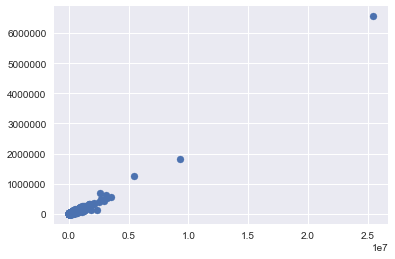

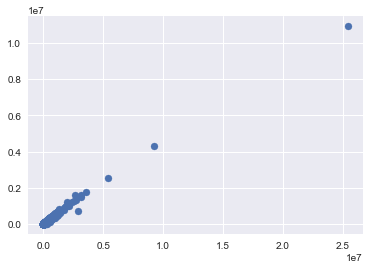

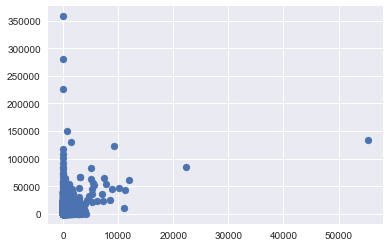

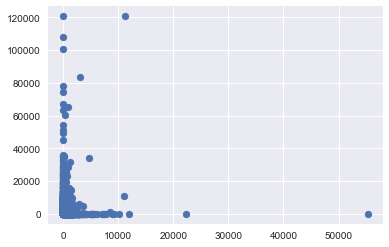

In [11]:
#plot TOTALREV vs Total employee benefit program (Z34)

plt.figure(1)

num_students = data['V33']

totalrev = data['TOTALREV']
emp_benefits = data['Z34']
plt.scatter(totalrev, emp_benefits)


plt.figure(2)
salaries = data['Z32']
plt.scatter(totalrev,salaries)
plt.show()



priv_conts = data['U50']
pupil_support = data['E17']
instr_benefits = data['J13']

# private contributions (U50) vs pupil support (E17)
plt.figure(3)
plt.scatter(priv_conts, pupil_support)

# private contributions vs instruction benefits
plt.figure(4)
plt.scatter(priv_conts, instr_benefits)


In [12]:
#validation
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
emp_benefits_train = data["Z34"][0:7000]
emp_benefits_valid = data["Z34"][7000:]
salaries_train = data["Z32"][0:7000]
salaries_valid = data["Z32"][7000:]
pupil_support_train = data["E17"][0:7000]
pupil_support_valid = data["E17"][7000:]

total_rev_train = data['TOTALREV'][0:7000]
total_rev_valid = data['TOTALREV'][7000:]


/Users/jpbesgen/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [13]:
myOLS = sm.OLS(salaries_train,emp_benefits_train).fit()
wage_hat = myOLS.predict(emp_benefits_valid)
mse = 1/len(salaries_valid)*np.dot((salaries_valid - wage_hat),(salaries_valid - wage_hat))
print("The MSE for the model wage~points is:", mse)

The MSE for the model wage~points is: 4825700016.79


In [14]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm


X = data["Z32"]
y = pd.DataFrame(data.TOTALREV, columns=["TOTALREV"])

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               TOTALREV   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                 1.218e+06
Date:                Tue, 03 Oct 2017   Prob (F-statistic):               0.00
Time:                        22:57:42   Log-Likelihood:            -1.6781e+05
No. Observations:               14376   AIC:                         3.356e+05
Df Residuals:                   14375   BIC:                         3.356e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Z32            2.1949      0.002   1103.726      0.000       2.191       2.199
==============================================================================
Omnibus:                    25840.545   Durbin-Watson:                   1.756
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        605632641.496
Skew:                          11.884   Prob(JB):                         0.00
Kurtosis:                    1008.240   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm


X = pd.DataFrame(data.TOTALREV,columns=["TOTALREV"])
y = pd.DataFrame(data.Z32, columns=["Z32"])

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Z32   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                 1.218e+06
Date:                Tue, 03 Oct 2017   Prob (F-statistic):               0.00
Time:                        22:57:43   Log-Likelihood:            -1.5643e+05
No. Observations:               14376   AIC:                         3.129e+05
Df Residuals:                   14375   BIC:                         3.129e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
TOTALREV       0.4503      0.000   1103.726      0.000       0.449       0.451
==============================================================================
Omnibus:                    18468.619   Durbin-Watson:                   1.722
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        303045838.522
Skew:                          -5.628   Prob(JB):                         0.00
Kurtosis:                     714.191   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

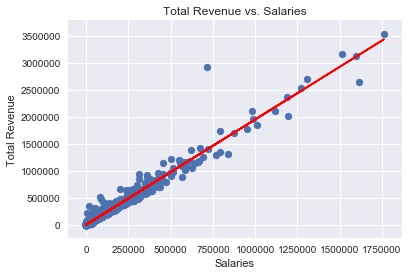

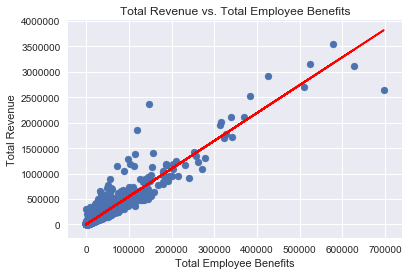

In [16]:
import statsmodels.api as sm

# drop highest values to see if we get more accurate model
dropped = data.drop([8500])
drop2 = dropped.drop([1039])
drop3 = drop2.drop([2732])

salaries = drop3['Z32']
totalrev = drop3['TOTALREV']
emp_benefits = drop3['Z34']
plt.figure(1)
myOLS_salaries = sm.OLS(totalrev,salaries).fit()
plt.plot(salaries, myOLS_salaries.predict(salaries), color = 'red')
plt.scatter(salaries, totalrev)
plt.title("Total Revenue vs. Salaries")
plt.xlabel("Salaries")
plt.ylabel("Total Revenue")
plt.show()
plt.close()

plt.figure(2)
myOLS_emp_benefits = sm.OLS(totalrev,emp_benefits).fit()
plt.plot(emp_benefits, myOLS_emp_benefits.predict(emp_benefits), color = 'red')
plt.scatter(emp_benefits, totalrev)
plt.title("Total Revenue vs. Total Employee Benefits")
plt.xlabel("Total Employee Benefits")
plt.ylabel("Total Revenue")
plt.show()

In [17]:
# get training data
salaries_train = salaries[0:7000]
salaries_valid = salaries[7000:]
totalrev_train = totalrev[0:7000]
totalrev_valid = totalrev[7000:]
emp_benefits_train = emp_benefits[0:7000]
emp_benefits_valid = emp_benefits[7000:]
priv_conts_train = priv_conts[0:7000]
priv_conts_valid = priv_conts[7000:]

# train
myOLS = sm.OLS(totalrev_train,salaries_train).fit()

In [18]:
# check error
totalrev_hat = myOLS.predict(salaries_valid)
mse = 1/len(totalrev_valid)*np.dot((totalrev_valid - totalrev_hat),(totalrev_valid - totalrev_hat))
print("The MSE for the model total revenue~salaries is:", mse)

The MSE for the model total revenue~salaries is: 549178970.648


Coefficients: 
 [ 938.23786125]
Mean squared error: 2548.07
Variance score: 0.47


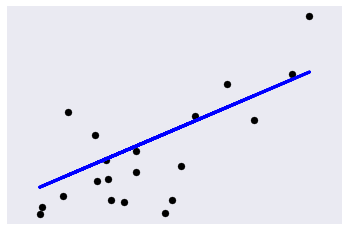

In [20]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
diabetes = datasets.load_diabetes()


# Use only one feature
diabetes_X = diabetes.data[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [21]:
data_1_3 = data[data['SCHLEV']<4]
data_1_3 = data_1_3[['SCHLEV','TOTALREV']]
data_1_3['LEV'] = np.zeros(13336)
data_1_3 = data_1_3.drop('SCHLEV', 1)
data_1_3

,TOTALREV,LEV
0,79665,0.0
1,330317,0.0
2,10519,0.0
3,26076,0.0
4,31825,0.0
5,68788,0.0
6,13097,0.0
7,17079,0.0
8,32384,0.0
9,23569,0.0


In [23]:
data_3_7 = data[data['SCHLEV']>3]
data_3_7 = data_3_7[['SCHLEV','TOTALREV']]
data_3_7['LEV'] = np.ones(1040)
data_3_7 = data_3_7.drop('SCHLEV', 1)
final_data = data_1_3.append(data_3_7)
final_data.columns = ['X', 'y']
final_data

,X,y
0,79665,0.0
1,330317,0.0
2,10519,0.0
3,26076,0.0
4,31825,0.0
5,68788,0.0
6,13097,0.0
7,17079,0.0
8,32384,0.0
9,23569,0.0


In [24]:
final_data = data_1_3.append(data_3_7)
final_data.columns = ['X', 'y']
final_data

,X,y
0,79665,0.0
1,330317,0.0
2,10519,0.0
3,26076,0.0
4,31825,0.0
5,68788,0.0
6,13097,0.0
7,17079,0.0
8,32384,0.0
9,23569,0.0


In [25]:
revTrain = final_data['X']
revLabels = np.asarray(final_data['y'])

In [26]:
def gradient(X, y, w, onept, lamb=0):
    """
    Compute gradient of regularized loss function. 
    Accomodate for if X is just one data point. 
    """
    y = np.matrix([y]).T

    if onept: 
        return 2 * lamb * w - ((y - sigmoid(X, w)) * X).reshape(w.size, 1)
    return 2 * lamb * w - np.dot(X.T, y - sigmoid(X, w)) / y.size

def sigmoid(X, w):
    """
    Compute the elementwise sigmoid of the product Xw
    Data in X should be rows, weights are a column. 
    """
    return 1 / (1 + np.exp(-np.dot(X, w)))

def loss(X, y, w, lamb=0):
    """
    Compute total loss for the data in X, labels in y, params w
    """
    sumcost = 0
    for i in range(X.shape[0]):
        sumcost += y[i] * np.log(sigmoid(X[i], w)) + (1 - y[i]) * np.log(1 - sigmoid(X[i], w))
    return lamb * np.linalg.norm(w)**2 - sumcost / y.size

def accuracy(X, y, w):
    """
    Compute accuracy for data in X, labels in y, params w
    """
    results = np.round(sigmoid(X, w))
    score = sum([results[i] == y[i] for i in range(y.size)]) / y.size
    return score[0]

In [27]:
revTrain = np.matrix([revTrain, np.ones(len(revTrain))]).transpose()
revTrain.shape

(14376, 2)

In [28]:
weights = np.matrix(np.asarray([np.random.rand() for i in range(2)])).transpose()
weights /= np.linalg.norm(weights)
losses = []
accuracies = []
epsilon = 0.0001
num_iterations = 10000
weights.shape

(2, 1)

In [29]:
for i in range(num_iterations):
    diff = epsilon * gradient(revTrain, revLabels, weights, False, 3)
    weights = weights - diff

/Users/jpbesgen/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: overflow encountered in exp


In [30]:
new_data = np.matrix([40440, 1])
y_data = np.array([0])
print(sigmoid(new_data, weights))
accuracy(new_data, y_data, weights)

[[ 0.]]


/Users/jpbesgen/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: overflow encountered in exp


matrix([[ 1.]])

In [31]:
weights

matrix([[-0.07698657],
        [ 0.00865309]])